## Review ablation surfaces for 2015 team paper

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pd.describe_option('display')
pd.set_option('display.max_rows', 370)
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 200)

Populating the interactive namespace from numpy and matplotlib


In [20]:
import os
os.chdir( "/Users/brodzik/ipython_notebooks/charis/dehra_dun" )
!pwd

/Users/brodzik/ipython_notebooks/charis/dehra_dun


In [115]:
def get_surface_type( yyyy, surface_class, surface_type ):
    import glob
    list = glob.glob( "/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/*" + yyyy + "*" + surface_class + "*" + surface_type + ".dat")
    list.sort()
    from imp import reload
    import hypsometry
    reload(hypsometry)
    import re
    searchRegex = re.compile('(' + surface_class + '.\d{4})').search
    labels = [ ( m.group(1) ) for l in list for m in (searchRegex(l),) if m]
    
    # Read the first file to get the dates
    area = hypsometry.Hypsometry()
    area.read( list[0], verbose=False )
    df = pd.DataFrame(index=area.data.index)
    
    # Read each file in turn and total by doy
    for label,file in zip(labels,list):
        area.read( file, verbose=False )
        df[ label ] = area.data_by_doy()
    
    return( df )

In [116]:
yyyy = '2001'

In [117]:
surface_type = 'snow_on_ice_area'
grsize_scag_on_ice = get_surface_type( yyyy, 'GRSIZE_SCAG', surface_type )
grsize_drfs_on_ice = get_surface_type( yyyy, 'GRSIZE_DRFS',  surface_type )
albedo_mcd_on_ice = get_surface_type( yyyy, 'ALBEDO_MCD',  surface_type )
albedo_mod10a1_on_ice = get_surface_type( yyyy, 'ALBEDO_MOD10A1',  surface_type )

In [118]:
surface_type = 'ablation_area'
grsize_scag_ablation = get_surface_type( yyyy, 'GRSIZE_SCAG', surface_type )
grsize_drfs_ablation = get_surface_type( yyyy, 'GRSIZE_DRFS',  surface_type )
albedo_mcd_ablation = get_surface_type( yyyy, 'ALBEDO_MCD',  surface_type )
albedo_mod10a1_ablation = get_surface_type( yyyy, 'ALBEDO_MOD10A1',  surface_type )

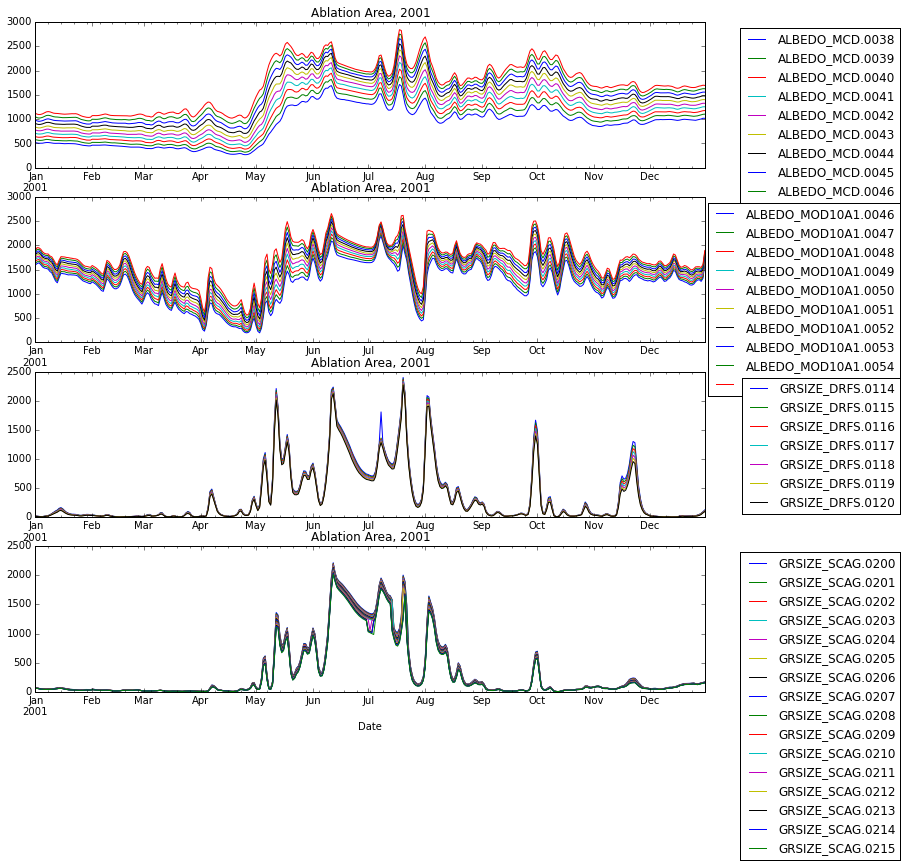

In [119]:
title = 'Ablation Area, ' + yyyy
fig, axes = plt.subplots(4, 1, figsize=(12,12) )
albedo_mcd_ablation.plot( title=title, ax=axes[0] )
axes[0].legend(bbox_to_anchor=(1.3,1.0))
albedo_mod10a1_ablation.plot( title=title, ax=axes[1] )
axes[1].legend(bbox_to_anchor=(1.3,1.0))
grsize_drfs_ablation.plot( title=title, ax=axes[2] )
axes[2].legend(bbox_to_anchor=(1.3,1.0))
grsize_scag_ablation.plot( title=title, ax=axes[3] )
axes[3].legend(bbox_to_anchor=(1.3,1.0))

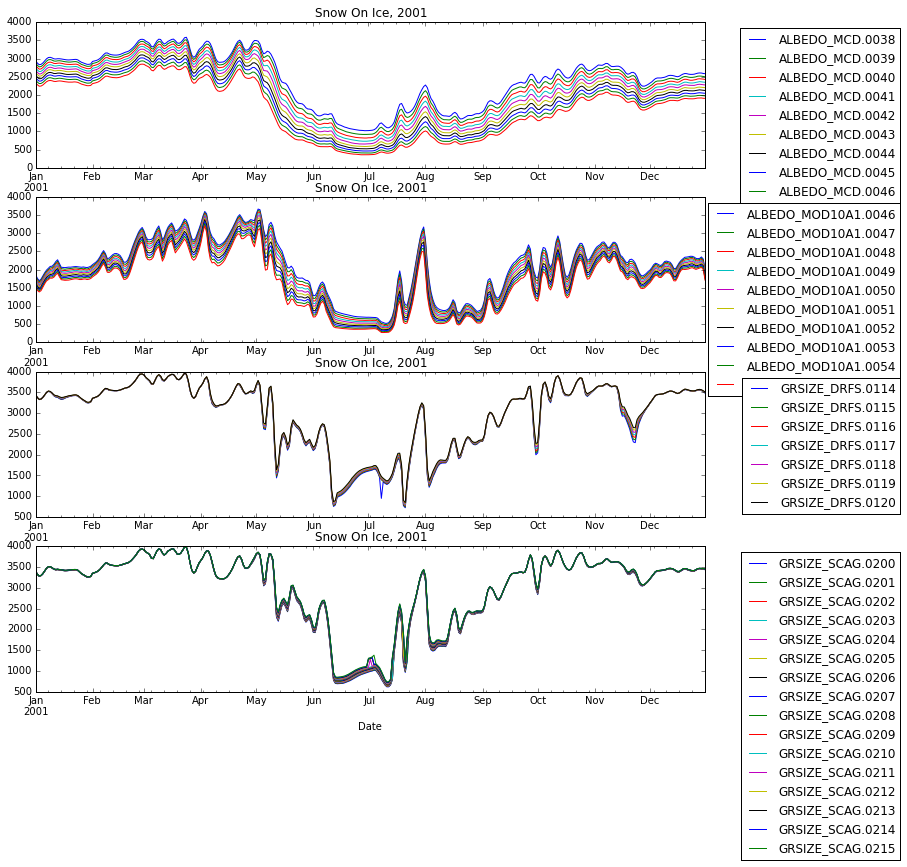

In [120]:
title = 'Snow On Ice, ' + yyyy
fig, axes = plt.subplots(4, 1, figsize=(12,12) )
albedo_mcd_on_ice.plot( title=title, ax=axes[0] )
axes[0].legend(bbox_to_anchor=(1.3,1.0))
albedo_mod10a1_on_ice.plot( title=title, ax=axes[1] )
axes[1].legend(bbox_to_anchor=(1.3,1.0))
grsize_drfs_on_ice.plot( title=title, ax=axes[2] )
axes[2].legend(bbox_to_anchor=(1.3,1.0))
grsize_scag_on_ice.plot( title=title, ax=axes[3] )
axes[3].legend(bbox_to_anchor=(1.3,1.0))

In [121]:
surface_type = 'snow_off_ice_area'
grsize_scag_off_ice = get_surface_type( yyyy, 'GRSIZE_SCAG', surface_type )
grsize_drfs_off_ice = get_surface_type( yyyy, 'GRSIZE_DRFS',  surface_type )
albedo_mcd_off_ice = get_surface_type( yyyy, 'ALBEDO_MCD',  surface_type )
albedo_mod10a1_off_ice = get_surface_type( yyyy, 'ALBEDO_MOD10A1',  surface_type )

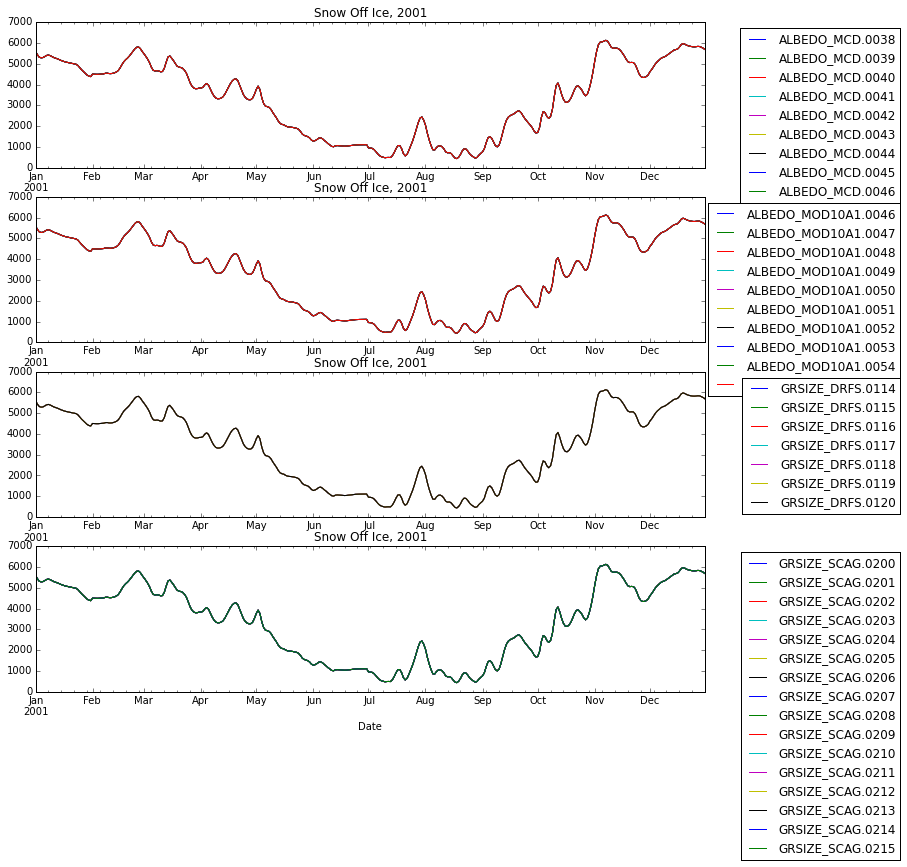

In [122]:
title = 'Snow Off Ice, ' + yyyy
fig, axes = plt.subplots(4, 1, figsize=(12,12) )
albedo_mcd_off_ice.plot( title=title, ax=axes[0] )
axes[0].legend(bbox_to_anchor=(1.3,1.0))
albedo_mod10a1_off_ice.plot( title=title, ax=axes[1] )
axes[1].legend(bbox_to_anchor=(1.3,1.0))
grsize_drfs_off_ice.plot( title=title, ax=axes[2] )
axes[2].legend(bbox_to_anchor=(1.3,1.0))
grsize_scag_off_ice.plot( title=title, ax=axes[3] )
axes[3].legend(bbox_to_anchor=(1.3,1.0))

In [124]:
import fnmatch

In [125]:
rootPath = "/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/"
pattern = "*" + yyyy + "*" + surface_class + "*" + surface_type + ".dat"
pattern

'*2001*ALBEDO_MCD*snow_off_ice_area.dat'

In [127]:
for root, dirs, files in os.walk(rootPath):
    for fn in fnmatch.filter(files,pattern):
        print(os.path.join(root,fn))

/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0039.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0047.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0041.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0038.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0046.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0040.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0043.snow_off_ice_area.dat
/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0045.snow_off_ice_a